# **Project Title: Public Transport Demand Prediction**

**Problem** **Description**

## This challenge ask you to build a model that predicts the number of seats that Mobiticket can expect to sell in each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes ends in Nairobi and originate in towns to the North-West of Nairobi.

## The towns from which these routes originate are:

*   Awendo
*   Homa Bay
*    Kehancha
*   Kendu Bay
*   Keroka
*   Keumbu
*   Kijauri
*   Kisii
*   Mbita
*   Migori
*   Ndhiwa
*   Nyachenge
*   Oyugis
*   Rodi
*   Rongo
*   Sirari
*   Sori


### These routes from 14 origins at the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from the time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in the Central Business District, takes another 2 to 3 hours depending on the traffic. The three stops that all these routes makes in Nairobi(in order) are:


1.   Kawangware: the first stop in the outskirts of Nairobi.
2.   Westlands:
3.   Afya centre: the bus centre where most passengers disembark.



###     Passengers from these bus (or shuttle ) rides are affected by the Nairobi traffic not only during there ride into the city, but from there they must continue their journey to there final destination in Nairobi wherever they may be. Traffic can act as a deterent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand traffic maybe an indication for people's movement patterns, reflection business hours, cultural events, political events, and holidays.

### **Data Description:**
 ####     **train_revised.csv**: Historical data of the transportation to Nairobi.


#### **Attribute Information**

The following are descriptions the fields.


*   ride_id : unique ID of a vehicle on a specific route on a specific day and time.
*   seat_number : seat assigned to the ticket.

*   payment_method : Method used by customer to buy ticket from Mobiticket(Cash or Mpesa).
*   payment_receipt : unique id number for ticket purchased from Mobiticket.

*   travel_date : date of ride departure (MM/DD/YYYY).
*   travel_time : Schedule departure time of ride, Rides generally depart on time. (hh:mm).
*   travel_from : time from which ride originated.
*   travel_to : designation of rides. All rides are to Nairobi.
*   car_type : vehicle type (shuttle or bus).
*   max_capacity : number of seats on a vehicle.

##### **Importing Libraries:**

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
# Importing Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns
# Importing Modelling libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Importing warnings so as to handle the warnings. Python by default displays warnings once per module session. But, however sometimes we want to
# ingore that, by importing these warnings you can control how warnings are handled and ensure that the code execute correctly.
import warnings

warnings.filterwarnings("ignore")
# Importing rs2score to determine how well algorithms can predict target variable
from sklearn.metrics import r2_score
# Importing mean_squared_error to evaluate the distance between predicted and actual values of the variables.
from sklearn.metrics import mean_squared_error
# importing MinMaxScaler to scale data between (0-1).
from sklearn.preprocessing import MinMaxScaler
# Importing datetime to handle datetime of the data
import datetime
import time

#### **Loading** **Dataset**

 ##### **Here we are parsing the datetime columns in its proper format.**

In [ ]:
df= pd.read_csv('train_revised.csv',parse_dates=["travel_date","travel_time"])

###### **File structure and content information**

In [ ]:
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,2023-03-09 07:15:00,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,2023-03-09 07:12:00,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,2023-03-09 07:05:00,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,2023-03-09 07:10:00,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,2023-03-09 07:12:00,Migori,Nairobi,Bus,49


In [ ]:
# checking the shape of the dateset
shape=df.shape
print("Rows :"+str(shape[0]) +", Columns :"+str(shape[1]))

Rows :51645, Columns :10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ride_id          51645 non-null  int64         
 1   seat_number      51645 non-null  object        
 2   payment_method   51645 non-null  object        
 3   payment_receipt  51645 non-null  object        
 4   travel_date      51645 non-null  datetime64[ns]
 5   travel_time      51645 non-null  datetime64[ns]
 6   travel_from      51645 non-null  object        
 7   travel_to        51645 non-null  object        
 8   car_type         51645 non-null  object        
 9   max_capacity     51645 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 3.9+ MB


In [ ]:
df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

###### **Describing dataset and checking for null values.**

In [ ]:
# describing the columns of the data to check values like minimum, mean, maximum for integer type data. Here include= 'all' is taking object
# type data as well which will return frequent count, nummber of unique values, etc.
df.describe(include= 'all')

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
count,51645.000000,51645,51645,51645,51645,51645,51645,51645,51645,51645.000000
unique,NaN,61,2,51645,149,78,17,1,2,NaN
top,NaN,1,Mpesa,UZUEHCBUSO,2017-10-12 00:00:00,2023-03-09 07:09:00,Kisii,Nairobi,Bus,NaN
freq,NaN,2065,51532,1,856,3926,22607,51645,31985,NaN
first,NaN,NaN,NaN,NaN,2017-01-12 00:00:00,2023-03-09 05:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2018-12-04 00:00:00,2023-03-09 23:10:00,NaN,NaN,NaN,NaN
mean,10188.645793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.534321
std,2211.295708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.451193
min,1442.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
25%,8287.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000


In [ ]:
# checking if we are having any duplicates in the dataset
len(df[df.duplicated()])

0

In [ ]:
df.nunique()

ride_id             6249
seat_number           61
payment_method         2
payment_receipt    51645
travel_date          149
travel_time           78
travel_from           17
travel_to              1
car_type               2
max_capacity           2
dtype: int64



*   Here we got different unique counts of each columns of the dataset.



In [ ]:
df.isnull().any()

ride_id            False
seat_number        False
payment_method     False
payment_receipt    False
travel_date        False
travel_time        False
travel_from        False
travel_to          False
car_type           False
max_capacity       False
dtype: bool

*  There are 51645 rows or observations and 10 columns in this dataset. There seems to be no null values in it. It has integer, datetime and object as data types


###### **Data cleaning and Exploratory data analysis and feature engineering**

In [ ]:
# value_counts get you different values of the uniques counts in the dataset.

In [ ]:
df['travel_date'].value_counts()

2017-10-12    856
2017-12-14    797
2017-12-13    730
2017-07-12    723
2017-08-12    722
             ... 
2017-12-25      8
2017-10-17      1
2017-11-19      1
2017-11-26      1
2017-11-14      1
Name: travel_date, Length: 149, dtype: int64

In [ ]:
df['travel_from'].value_counts()

Kisii        22607
Migori        7027
Homa Bay      6304
Sirare        4449
Rongo         3928
Kehancha      1909
Awendo        1788
Kijauri       1031
Keroka         988
Nyachenge      512
Rodi           405
Mbita          378
Ndhiwa         236
Sori            55
Keumbu          22
Oyugis           5
Kendu Bay        1
Name: travel_from, dtype: int64

In [ ]:
# we want to prediction the number of tickets that Mobiticket can sell but in our data we are not having any dependent variable so we have to create it.
# Here we are applying transform on a group and getting the count of non-nulls as storing these values into a new column called 'no_of_ticket'
df['no_of_ticket']=df.groupby(['travel_date','travel_time','travel_from','car_type'])['travel_time'].transform("count")

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Our data contains lots of categorical data that we need to encode this into a numerical data. One such method to do this is labelencoding
# LabelEncoder creates an ordering of the categorical values in the format that can be used by various algorithms.
le= LabelEncoder()
df['travel_from']= le.fit_transform(df['travel_from'])
df['car_type']= le.fit_transform(df['car_type'])
df['payment_method']= le.fit_transform(df['payment_method'])

In [ ]:
# mapping datetime is the process of converting dates and times into numerical values.
df["day"] = df['travel_date'].map(lambda x: x.day)
df["year"] = df['travel_date'].map(lambda x: x.year)
df["month"] = df['travel_date'].map(lambda x: x.month)

In [ ]:
df['hour']= df['travel_time'].dt.hour

df['minute'] =df['travel_time'].dt.minute

In [ ]:
# mapping week and weekdays into numerical values.
df['week']= df['travel_date'].dt.week
df['day_of_week']= df['travel_date'].dt.weekday

In [ ]:
# dropping unnecessary columns.
df=df.drop(['seat_number','ride_id','payment_receipt','travel_time', 'travel_to'],axis= 1)

In [ ]:
df.head()

,payment_method,travel_date,travel_from,car_type,max_capacity,no_of_ticket,day,year,month,hour,minute,week,day_of_week
0,1,2017-10-17,9,0,49,1,17,2017,10,7,15,42,1
1,1,2017-11-19,9,0,49,1,19,2017,11,7,12,46,6
2,1,2017-11-26,4,0,49,1,26,2017,11,7,5,47,6
3,1,2017-11-27,1,0,49,5,27,2017,11,7,10,48,0
4,1,2017-11-27,9,0,49,31,27,2017,11,7,12,48,0


In [ ]:
df= df.drop(['week', 'travel_date','max_capacity','payment_method'], axis=1)

df.head()

,travel_from,car_type,no_of_ticket,day,year,month,hour,minute,day_of_week
0,9,0,1,17,2017,10,7,15,1
1,9,0,1,19,2017,11,7,12,6
2,4,0,1,26,2017,11,7,5,6
3,1,0,5,27,2017,11,7,10,0
4,9,0,31,27,2017,11,7,12,0


# **Correlation Matrix**



Correlation is a statistical term used to measure the degree in which two variables move in relation to each other. A perfect positive correlation means that the correlation coefficient is exactly 1. This implies that as one variable moves, either up or down, the other moves in the same direction. A perfect negative correlation means that two variables move in opposite directions, while a zero correlation implies no linear relationship at all.

By checking the correlation the factors affecting sales can be figured out.

<AxesSubplot: >

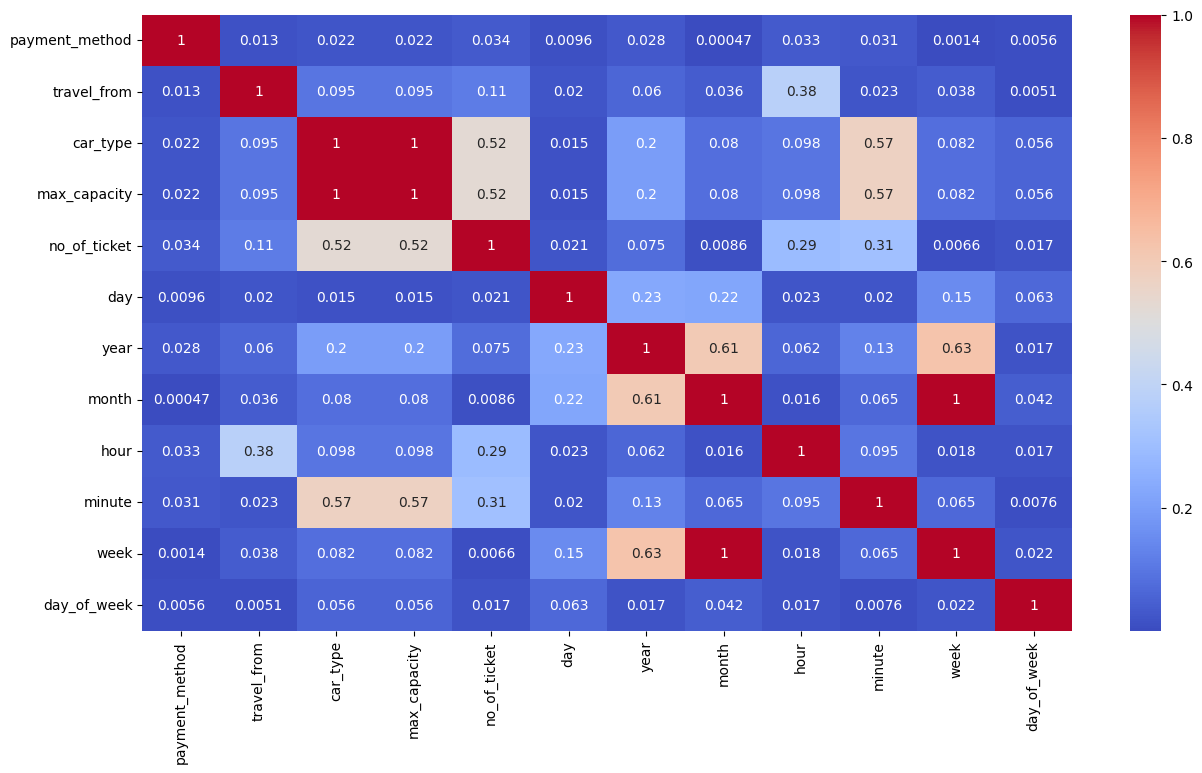

In [ ]:
plt.figure(figsize= (15,8))
correlation= df.corr()
sns.heatmap(abs(correlation),annot= True, cmap= 'coolwarm')

<AxesSubplot: xlabel='year', ylabel='count'>

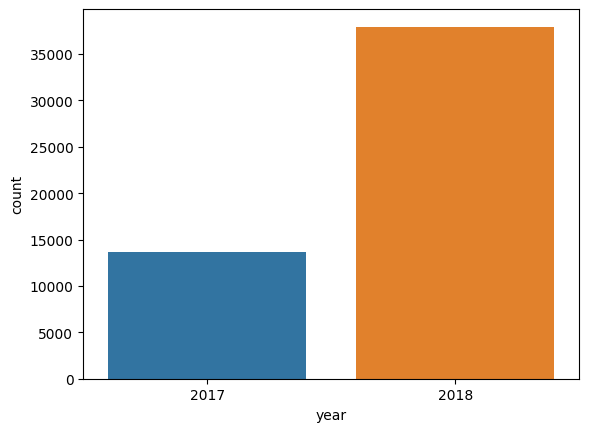

In [ ]:
## plotting count of different year in the dataset.
sns.countplot(x=df['year'])

### Bivariate Analysis dependent variable vs the columns

<function matplotlib.pyplot.show(close=None, block=None)>

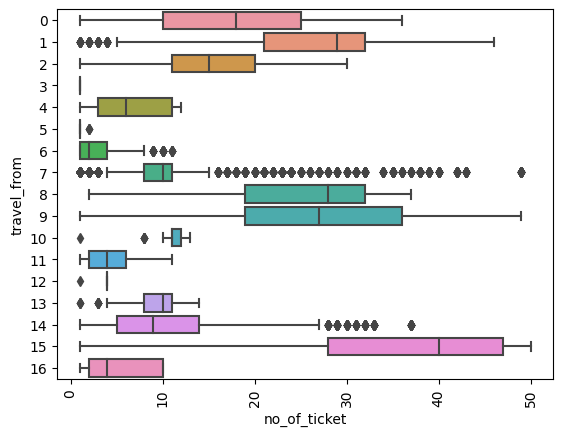

In [ ]:
sns.boxplot(x='no_of_ticket',y='travel_from', data=df, orient= 'h')
plt.xticks(rotation= 90)
plt.show

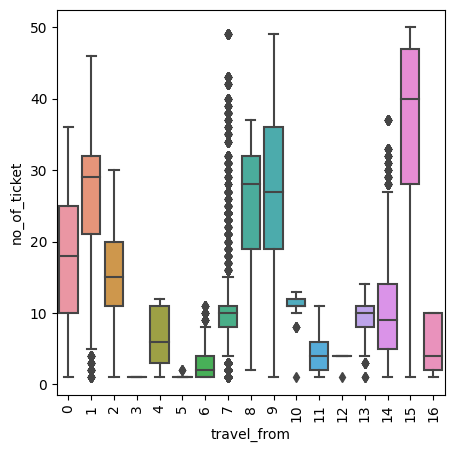

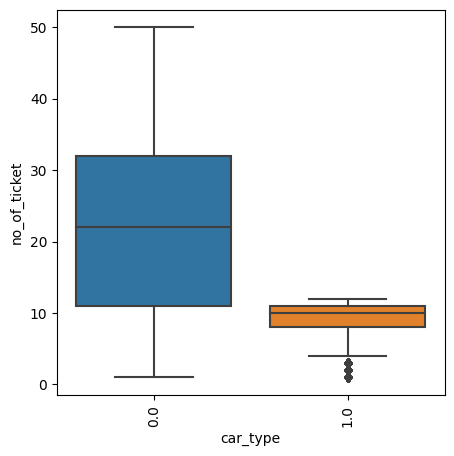

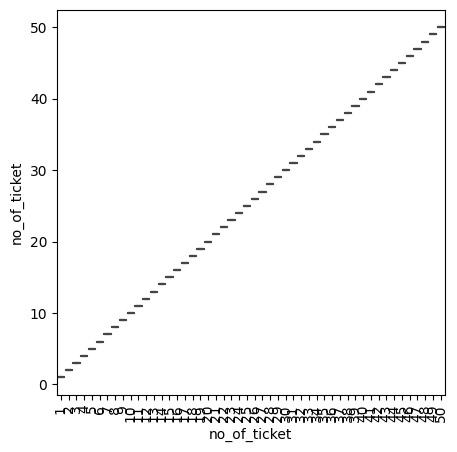

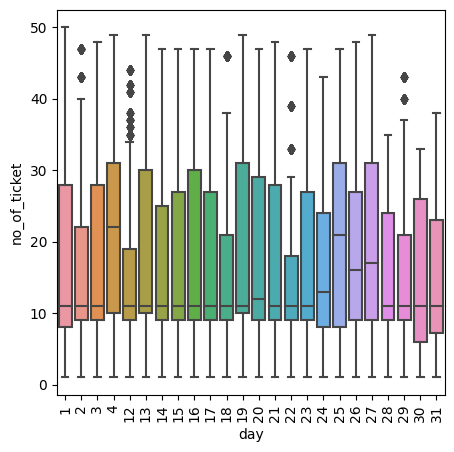

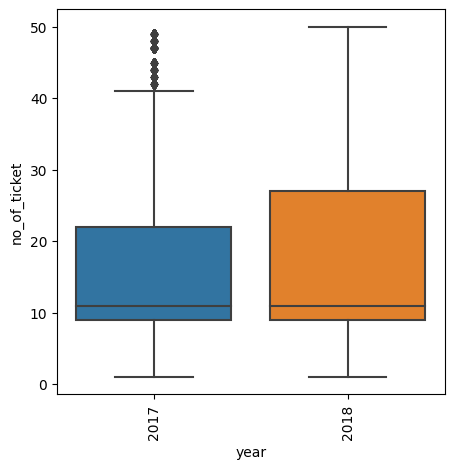

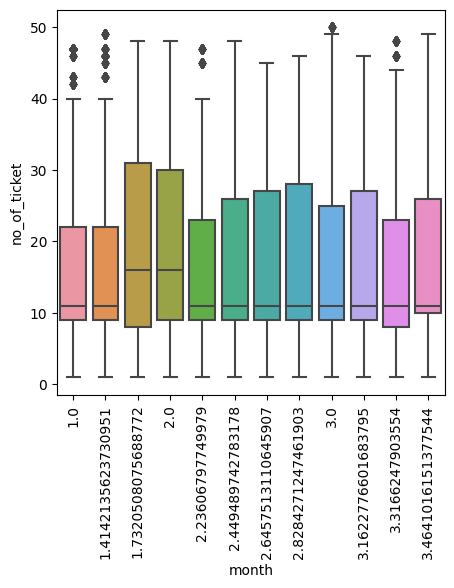

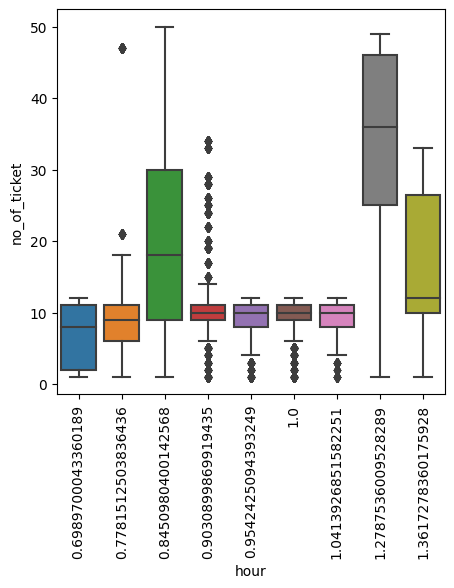

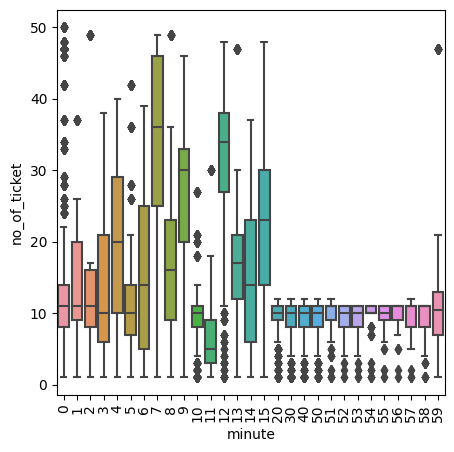

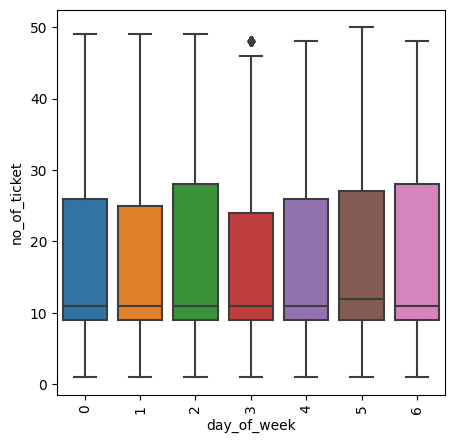

In [ ]:
for col in df:
            plt.figure(figsize= (5,5))
            sns.boxplot(x=col,y='no_of_ticket', data=df)
            plt.xticks(rotation= 90)

### Univariate analysis of the columns.

In [ ]:
from scipy.stats import skew
from scipy.stats import norm

0.15848720881286768
0.4914982701752371
0.9169440147433433
0.12684216295371148
-1.0633705448916564
0.3607319294350854
2.383545349155727
1.3656537637440016
0.08675284084833733


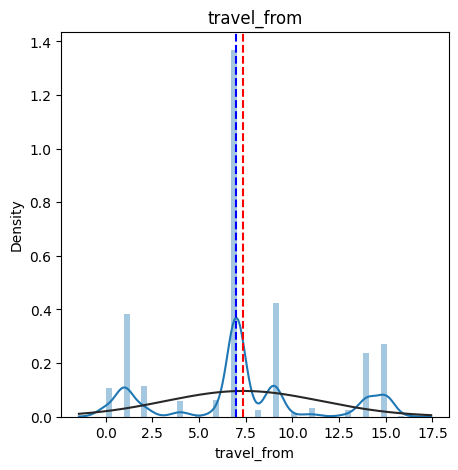

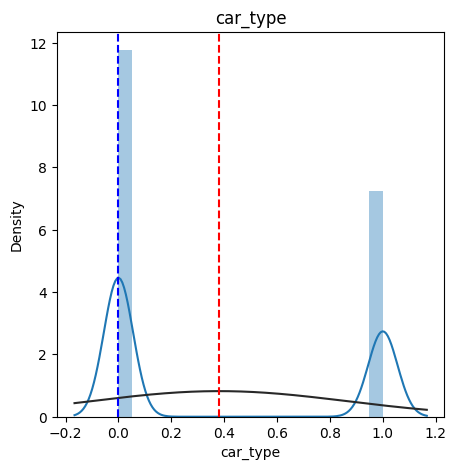

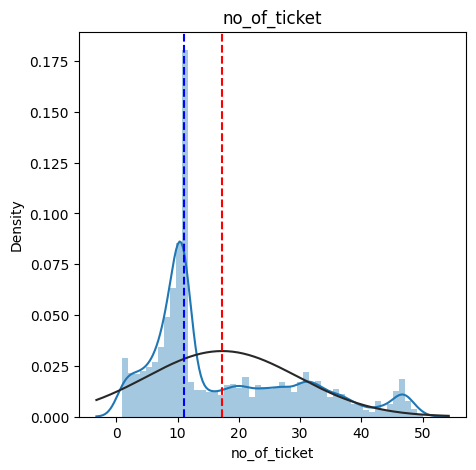

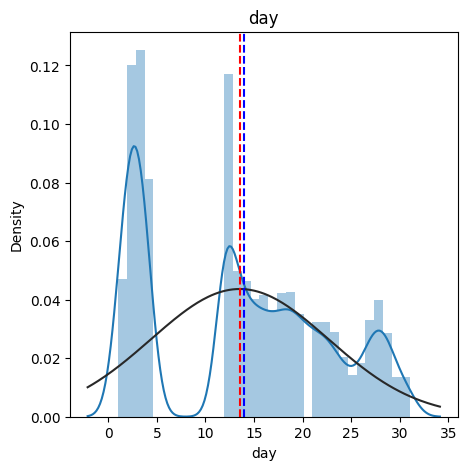

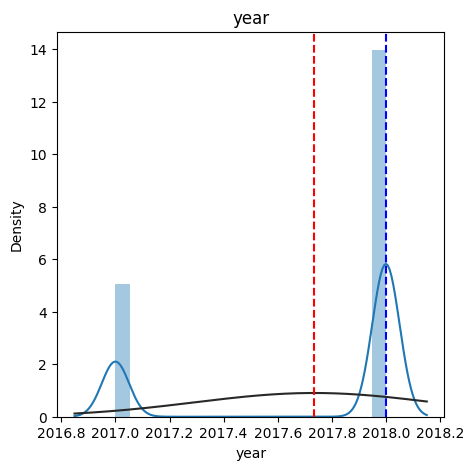

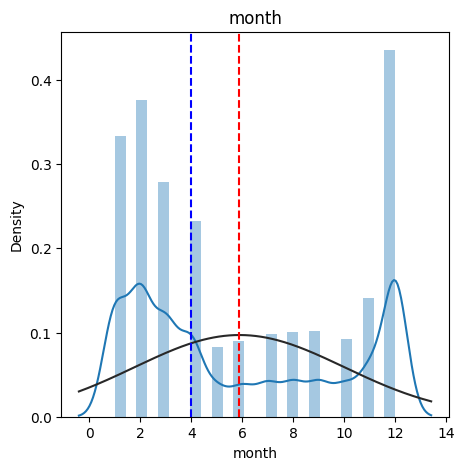

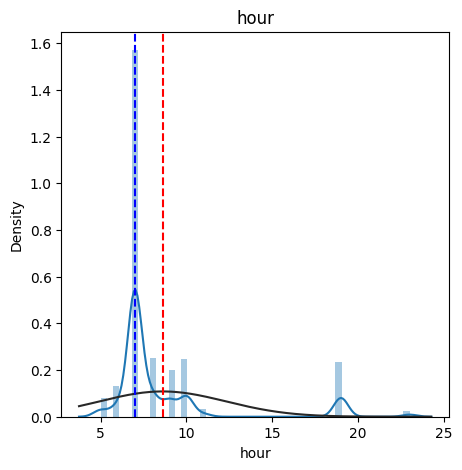

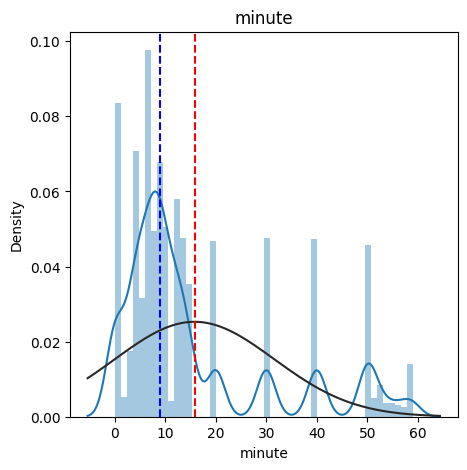

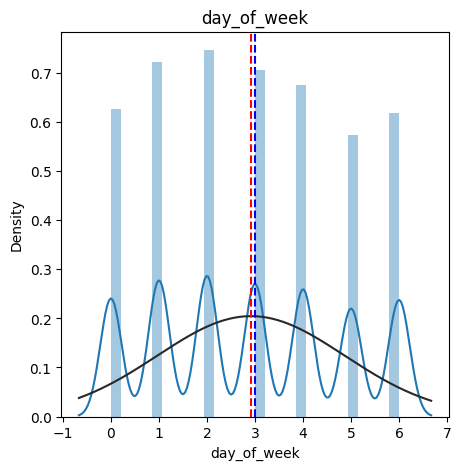

In [ ]:
for col in df:
#     print(df)
    print(skew(df[col]))

    fig= plt.figure(figsize= (5,5))
    feature= df[col]
    ax= fig.gca()
#     feature.hist(bins=60, ax=ax)
    sns.distplot(df[col], fit= norm)
    ax.axvline(feature.mean(),color='red', linestyle='dashed')
    ax.axvline(feature.median(), color='blue', linestyle= 'dashed')
    ax.set_title(col)
    plt.show


In [ ]:
print(df.columns)
print(skew(df))

Index(['travel_from', 'car_type', 'no_of_ticket', 'day', 'year', 'month',
       'hour', 'minute', 'day_of_week'],
      dtype='object')
[ 0.15848721  0.49149827  0.91694401  0.12684216 -1.06337054  0.36073193
  2.38354535  1.36565376  0.08675284]


In [ ]:
## checking transformed skewness of the columns.
print(skew(np.log10(df['hour'])))
print(skew(np.sqrt(df['month'])))
print(skew(np.log10(df['no_of_ticket'])))
print(skew(np.sqrt(df['car_type'])))

1.8152525615596282
0.07743085330613246
-0.7599198203297667
0.4914982701752371


In [ ]:
df['hour']= np.log10(df['hour'])
df['month']= np.sqrt(df['month'])
# df['no_of_ticket']= np.log10(df['no_of_ticket'])
df['car_type']= np.sqrt(df['car_type'])

travel_from
0.15848720881286768


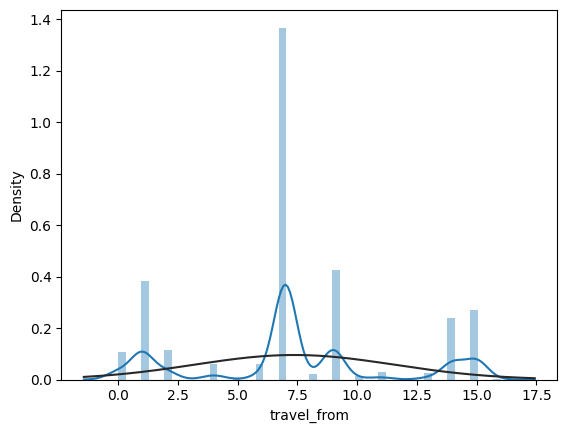

car_type
0.4914982701752371


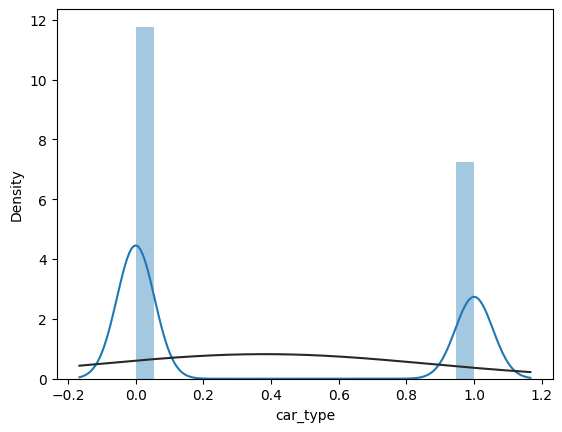

no_of_ticket
0.9169440147433433


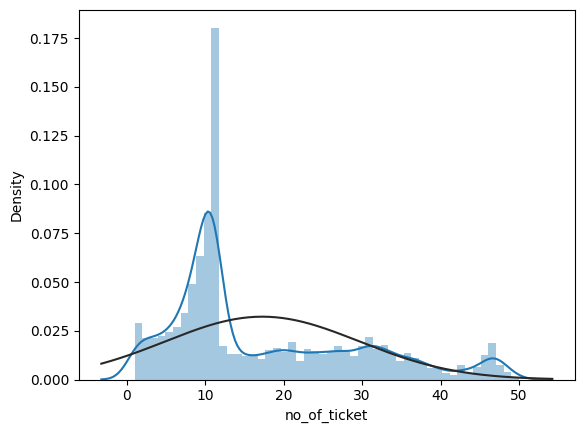

day
0.12684216295371148


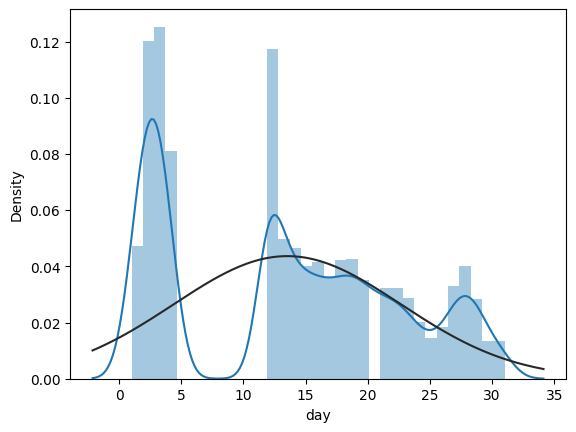

year
-1.0633705448916564


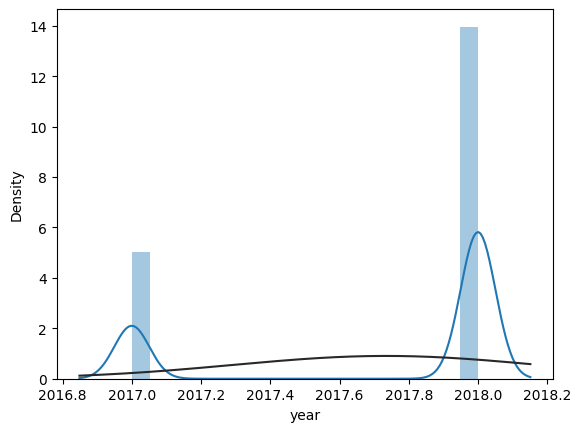

month
0.07743085330613246


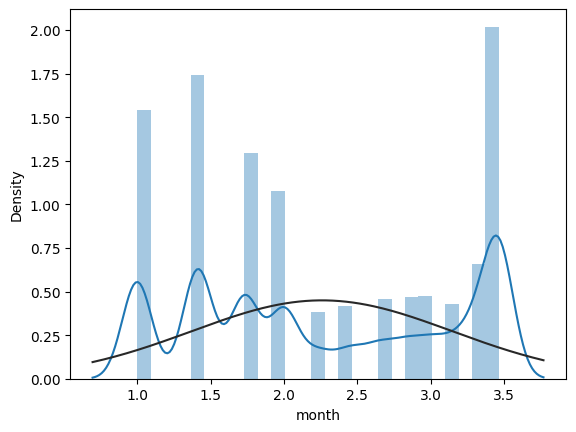

hour
1.8152525615596282


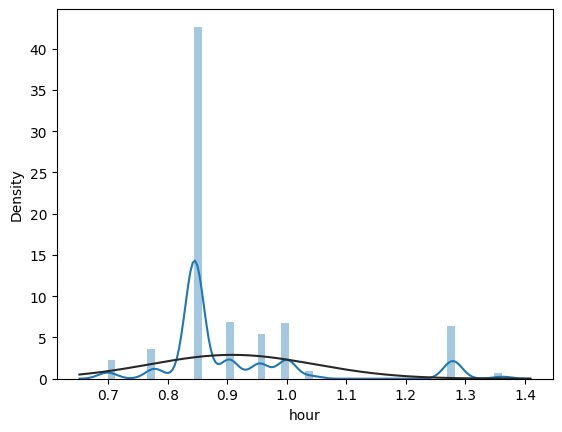

minute
1.3656537637440016


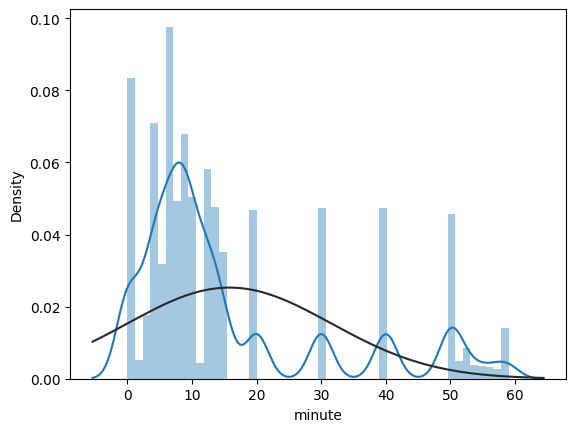

day_of_week
0.08675284084833733


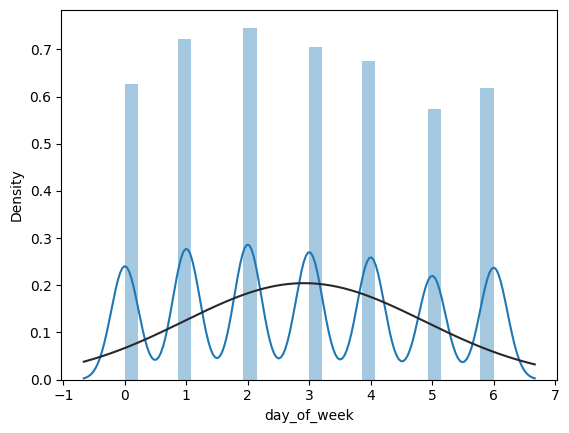

In [ ]:
# Visualizating the columns after the transformation.
from scipy.stats import skew
for col in df:
  print(col)
  print(skew(df[col]))

  plt.figure()
  sns.distplot(df[col], fit= norm)
  plt.show()

<AxesSubplot: xlabel='no_of_ticket', ylabel='Density'>

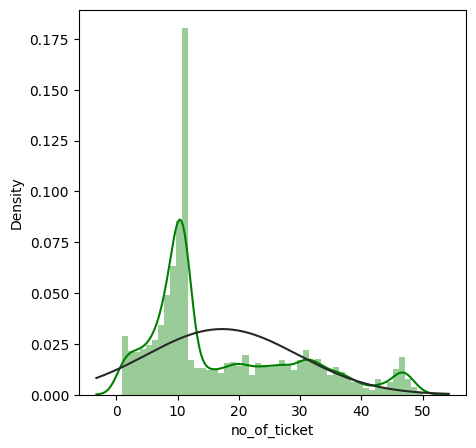

In [ ]:
plt.figure(figsize= (5,5))
sns.distplot(df['no_of_ticket'], color= "g", fit= norm)

#### **Preprocessing and Standardizing**

In [ ]:
## Importing required Libraries
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import zscore

In [ ]:
# Determing independent and dependent variable best suited for modelling
# Data for all the independent variables
X = df.drop(labels='no_of_ticket',axis=1).apply(zscore)
# Data for the dependent variable
Y = df['no_of_ticket']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   travel_from  51645 non-null  float64
 1   car_type     51645 non-null  float64
 2   day          51645 non-null  float64
 3   year         51645 non-null  float64
 4   month        51645 non-null  float64
 5   hour         51645 non-null  float64
 6   minute       51645 non-null  float64
 7   day_of_week  51645 non-null  float64
dtypes: float64(8)
memory usage: 3.2 MB


In [ ]:
# Importing required Libraries
from sklearn.model_selection import train_test_split
#Divding the data set into Training and testing dataset using Test Train split
#we have takes 80% - 20% ratio for Test Train Split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size= 0.2, random_state= 0)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(41316, 8) (41316,)
(10329, 8) (10329,)


In [ ]:
## standardizing the values.
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# to check Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

       feature       VIF
0  travel_from  1.162186
1     car_type  1.572639
2          day  1.437042
3         year  2.082113
4        month  2.045880
5         hour  1.154814
6       minute  1.505446
7  day_of_week  1.011500


In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['travel_from']]])

,variables,VIF
0,car_type,3.088277
1,no_of_ticket,4.441369
2,day,3.452045
3,year,60.487550
4,month,8.128471
5,hour,48.482386
6,minute,2.999694
7,day_of_week,3.269280


### **Fitting into different algorithms**

#### Fitting Linear Regression

In [ ]:
## importing linear regression
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, Y_train)
## fitting training data into linear regression model
reg.score(X_train, Y_train)

0.33459179801862526

In [ ]:
# getting the test score of linear regrssion.
reg.score(X_test,Y_test)

0.3451538772864321

In [ ]:
Y_actual=reg.predict(X_train)

In [ ]:
Y_pred = reg.predict(X_test)
Y_pred

array([21.80026812, 10.25079947, 19.91636844, ...,  8.729175  ,
       21.33117376, 21.05539798])

In [ ]:
reg.coef_

array([-0.29309399, -6.51576352, -0.27193961, -0.35472294,  0.34975026,
        3.08824878,  0.06121012, -0.22984123])

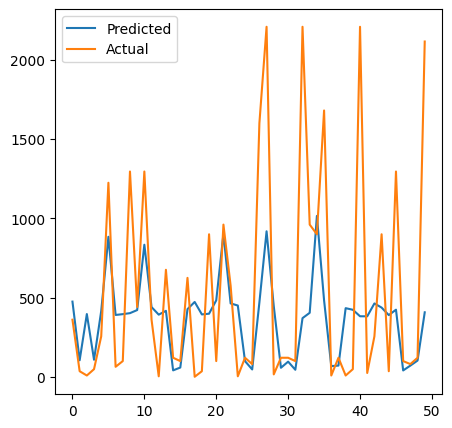

In [ ]:
#plotting the the actual and predicted sales values
plt.figure(figsize=(5,5))
plt.plot(Y_pred[:50]**2)
plt.plot(np.array((Y_test[:50])**2))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
## determining the distance of actual and the predicted output
MSE= mean_squared_error(Y_test,Y_pred)
print("MSE", MSE)

## taking root of the mean squared error.
RMSE= np.sqrt(MSE)
print("RMSE", RMSE)

MSE 101.45691223573337
RMSE 10.072582202977218


In [ ]:
# determing how our model is fitting the datapoint.
# As the number of predictors in the model increases, the R-squared score tends to increase as well, even if the additional predictors do not contribute
# significantly to the model's performance.
from sklearn.metrics import r2_score
r2_score= r2_score(10**Y_test,10**Y_pred)

print("r2_score", r2_score)

r2_score -2.9901942777940952e+26


In [ ]:
# adjusted r2score iscore adjusts the R-squared score by penalizing the addition of unnecessary predictors.
from sklearn.metrics import r2_score
print("Adjusted R2 : ",1-(1-r2_score(10**(Y_test), 10**(Y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted R2 :  -2.992512257854401e+26


### Fitting lasso Regression

In [ ]:
## importing lasso regression
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

lasso.fit(X_train, Y_train)

Lasso(alpha=0.1, max_iter=3000)

In [ ]:
## getting training score of the lasso regression
lasso.score(X_train, Y_train)

0.3339794858694696

In [ ]:
## getting test scores of lasso regression
lasso.score(X_test, Y_test)

0.3437052447892719

In [ ]:
y_pred_l = lasso.predict(X_test)
y_pred_l

array([21.61177041, 10.56509103, 20.3049759 , ...,  8.42221489,
       21.41058625, 21.22395733])

In [ ]:
y_pred_r= ridge.predict(X_test)
y_pred_l

In [ ]:

MSE  = mean_squared_error(10**(Y_test), 10**(y_pred_l))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 1.2555772141637033e+62
RMSE : 1.1205254187941046e+31


In [ ]:
from sklearn.metrics import r2_score
r2_score= r2_score(10**Y_test,10**Y_pred)
print("r2_score", r2_score)

r2_score -2.9901942777940952e+26


In [ ]:
from sklearn.metrics import r2_score
print("Adjusted R2 : ",1-(1-r2_score(10**(Y_test), 10**(y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted R2 :  -1.1830657772469012e+25


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-10}

Using  {'alpha': 1e-10}  the negative mean squared error is:  -101.6639579051034


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(Y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

from sklearn.metrics import r2_score
r2 = r2_score(10**(Y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(Y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 3.175926699987733e+63
RMSE : 5.6355360880645e+31
R2 : -2.9901942664396857e+26
Adjusted R2 :  -2.9925122464911896e+26


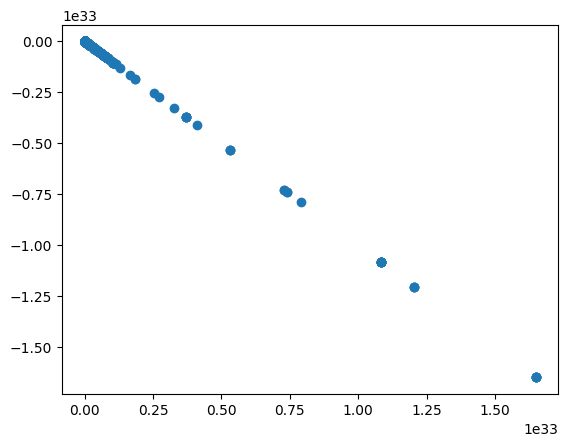

In [ ]:
plt.scatter(10**(y_pred_lasso),10**(Y_test)-10**(y_pred_lasso))

In [ ]:
# Implementing Ridge Regression
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)

In [ ]:
## fitting the training data into Ridge Regression
ridge.fit(X_train,Y_train)
## getting the score of the regression
ridge.score(X_train, Y_train)

In [ ]:
MSE  = mean_squared_error(10**(Y_test), 10**(y_pred_r))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(Y_test), 10**(y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(Y_test), 10**(y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

In [ ]:
# Running Grid Search Cross Validation for Ridge Regression
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,Y_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

In [ ]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(Y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(Y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(Y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

### Fitting Xgboost

In [ ]:
## importing xgboost regressor
from xgboost import XGBRegressor
XG_model=XGBRegressor()
## fitting the training data into the model
XG_model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
Y_pred=XG_model.predict(X_test)
Y_pred_train=XG_model.predict(X_train)
Y_pred=XG_model.predict(X_test)

In [ ]:
## getting the training score of the model
accuracy_score=XG_model.score(X_train,Y_train)
accuracy_score

0.9503340287029067

In [ ]:
## getting the test score of the model
accuracy_score_test=XG_model.score(X_test,Y_test)
accuracy_score_test

0.9423108751145794

<function matplotlib.pyplot.show(close=None, block=None)>

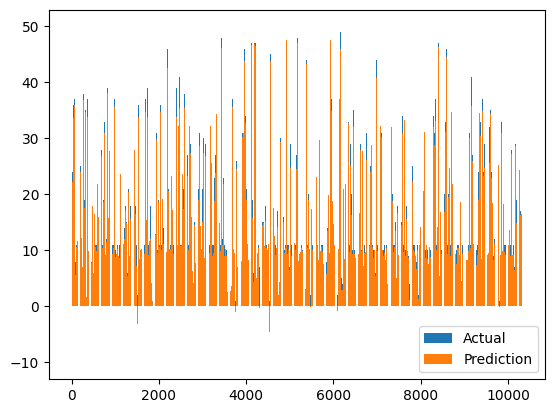

In [ ]:
## plotting the graph of actual vs predicted values
plt.bar(range(len(Y_test)), Y_test, label= "Actual")
plt.bar(range(len(Y_pred)), Y_pred, label= "Prediction")
plt.legend()
plt.show

In [ ]:
import xgboost as xgb

In [ ]:
dreg= xgb.XGBRegressor(n_estimators=100, max_depth=10)
dreg.fit(X_train, Y_train)
y_predbc = dreg.predict(X_test)
#Find R-squared value
# r2 = r2_score(Y_test, y_pred)
# Find Adjusted R-squared value
# adj_r2=1-(1-r2_score(Y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
train_score = dreg.score(X_train, Y_train)
test_score = dreg.score(X_test,Y_test)
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')

Train score: 0.9992428188685881
Test score: 0.9929535454880007


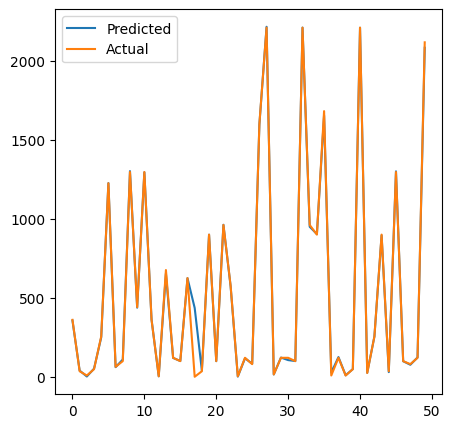

In [ ]:
#plotting the the actual and predicted values
plt.figure(figsize=(5,5))
plt.plot(y_predbc[:50]**2)
plt.plot(np.array((Y_test[:50])**2))
plt.legend(["Predicted","Actual"])
plt.show()

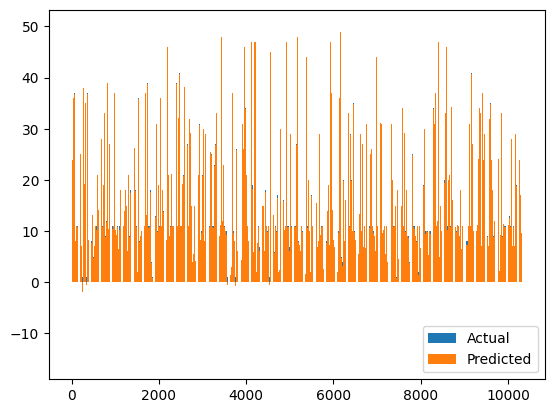

In [ ]:
#plotting the the actual and predicted values
plt.bar(range(len(Y_test)), Y_test, label="Actual")
plt.bar(range(len(y_predbc)), y_predbc, label="Predicted")
plt.legend()
plt.show()

### Fitting random forest

In [ ]:
## importing random forest regressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
###### RANDOM FOREST REGRESSION
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor(n_estimators=25)
## fitting the model
rdfreg = rdf.fit(X_train, Y_train)
print("Regresion Model Score" , ":" , rdfreg.score(X_train, Y_train) , "\n" ,
      "Out of Sample Test Score" ,":" , rdfreg.score(X_test, Y_test))
print("\n")
## getting training and testing score
y_predicted = rdfreg.predict(X_train)
Y_test_predicted = rdfreg.predict(X_test)

Regresion Model Score : 0.9989705495142374 
 Out of Sample Test Score : 0.9930461708720278




In [ ]:
##
from sklearn.metrics import r2_score
r2 = r2_score(Y_train ,y_predicted)
print("r2 score for a model which predicts mean value always is" ,r2)

r2 score for a model which predicts mean value always is 0.9989705495142374


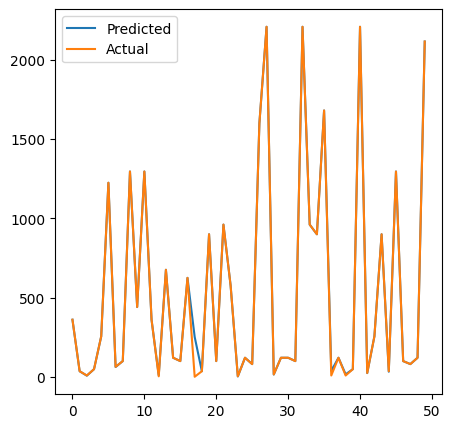

In [ ]:
#plotting the the actual and predicted sales values
plt.figure(figsize=(5,5mean
plt.plot((Y_test_predicted[:50])**2)
plt.plot(np.array((Y_test[:50])**2))
plt.legend(["Predicted","Actual"])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

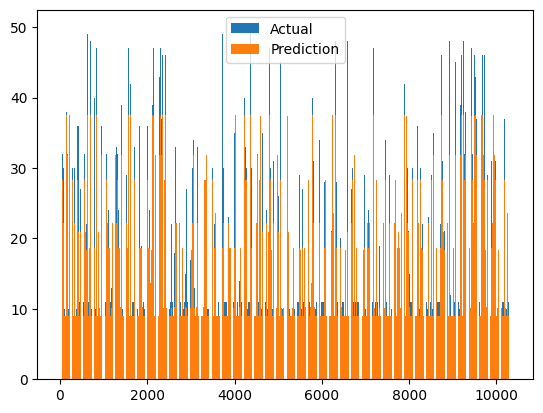

In [ ]:
plt.bar(range(len(Y_test)), Y_test, label= "Actual")
plt.bar(range(len(y_test_rf_reg)), y_test_rf_reg, label= "Prediction")
plt.legend()
plt.show

### Feature importance as per Random forest

In [ ]:
features = x_train.columns
importances = rdfreg.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(9,10))
plt.title("Feature Importance",fontsize=14)
plt.barh(range(len(indices)), importances[indices],color='g',align = 'center')
plt.yticks(range(len(indices)),features[indices])
plt.xlabel('Relative Importance')

### Fitting decision tree

In [ ]:
# importing Decision Tree
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(min_samples_leaf=10)
# fitting training data into decision tree algorithms.
treereg =tree.fit(X_train ,Y_train)
print("Regression Model Score" , ":" ,treereg.score(X_train,Y_train),"\n",
      "Out of sample Test score" ,":",treereg.score(X_test ,Y_test))
print("\n")
# Predicting the score of the model
yk_predicted = treereg.predict(X_train)
yk_test_predicted = treereg.predict(X_test)

Regression Model Score : 0.9681149557243632 
 Out of sample Test score : 0.9579643653403132




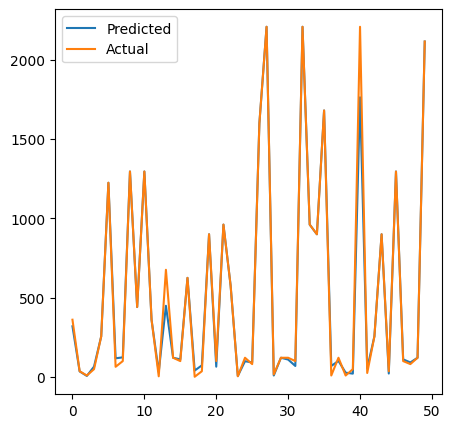

In [ ]:
#plotting the the actual and predicted sales values
plt.figure(figsize=(5,5))
plt.plot(yk_test_predicted[:50]**2)
plt.plot(np.array((Y_test[:50])**2))
plt.legend(["Predicted","Actual"])
plt.show()

### **Conclusion:-** With 99% Training Accuracy and 99% Testing Accuracy, Random Forest and Xgoost has proven to be the most efficient model out of the algorithms used in our model, including Linear Regression, Lasso Regression, Ridge Regression, Decision Tree, and Random Forest. Whereas, Linear Regression, Lasso and Rigde are not fitting well into the data points.